# Tarea 1

## Preparación del ambiente de programación

Para poder ejecutar los análisis de este cuaderno es necesario:

1. Instalar BLAST.
2. Descomprimir el archivo taxdb.btd.gz

Para hacerlo de forma automática desde R, podemos usar el *script* de BASH: `preparar_ambiente.sh`. Podemos ejecutar directamente el bloque siguiente, sin necesidad de salir del cuaderno:

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## 

## Introducción

El objetivo de este análisis explorar la distribución taxonónica de las secuencias homólogas a la proteína humana CHRNA3, una subunidad paráloga del receptor nicotínico de acetilcolina. 

## Métodos

La base de datos de secuencias en la que voy a buscar homologías es Swissprot, porque es una base de datos de proteínas ya instalada localmente en este ambiente.

Utilizaré **blastp** (Altschul *et al.*, 1990) con diferentes umbrales de valor E para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido. Es decir, a medida que acepto como resultados del **blastp** secuencias con un valor E mayor. 

## Resultados
### BLASTP individual
Primero, ejecuto una única búsqueda con **blastp**, usando un umbral de valor E de 1.0e-50, que es muy exigente: sólo las secuencias extremadamente parecidas a la original aparecerán en los resultados.

In [2]:
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA3.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

El resultado del comando anterior, guardado en "BlastOut01", es un montón de texto plano. Con las funciones `textConnection()` y `read.table()`, lo transformamos en un "data frame", una tabla donde cada columna es una variable.

In [3]:
TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Vemos la dimensión de la tabla que se ha creado:

In [4]:
dim(TablaOut01)

[1] 118  11

Y ahora visualizamos nuestra tabla:

In [5]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P32297.4,100.000,505,1,505,1,505,0.00e+00,9606,Homo sapiens,primates
Q07263.1,95.825,479,27,505,17,495,0.00e+00,9913,Bos taurus,even-toed ungulates
Q8R4G9.1,92.886,492,14,505,8,499,0.00e+00,10090,Mus musculus,rodents
P04757.1,92.308,494,12,505,6,499,0.00e+00,10116,Rattus norvegicus,rodents
P09481.2,85.232,474,31,504,22,495,0.00e+00,9031,Gallus gallus,birds
P18845.1,68.885,511,13,501,3,509,0.00e+00,7957,Carassius auratus,bony fishes
P49581.1,65.145,482,20,501,19,492,0.00e+00,9031,Gallus gallus,birds
Q15825.1,67.653,473,34,501,33,489,0.00e+00,9606,Homo sapiens,primates
Q5IS76.1,67.442,473,34,501,33,489,0.00e+00,9598,Pan troglodytes,primates


Hemos obtenido una tabla de 11 columnas con 118 filas, es decir, hemos encontrado 118 secuencias similares a nuestra proteína *query*.

Para realizar nuestra tabla hemos pedido que aparezcan las columnas con los siguientes identificadores, que se corresponden a las definiciones siguientes:
- **saccver**: número de acceso o identificador de la secuencia encontrada (*subject*).
- **pident**: porcentaje de identidad entre la *query* y el *subject* en su alineamiento local.
- **length**: longitud del alineamiento entre *query* y *subject*.
- **qstart**: primera posición de la *query* alineada.
- **qend**: última posición alineada en la *query*.
- **sstart**: primera posición de la *subject* alineada.
- **send**: última posición de la *subject* alineada.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la *subject*, en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la *subject*.
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la *subject*, usado para facilitar la interpretación.

### BLASTP en serie
Para ver cómo aumenta el número de secuencias a medida que aumenta el umbral de valor E, deberíamos repetir la búsqueda unas cuantas veces, con valores del parámetro `-evalue` diferentes. Podemos hacerlo de forma automática, por ejemplo, usando la función `lapply()`. El código siguiente ejecutará una búsqueda de **blastp** para cada valor del vector `Valores_E_maximos`. El resultado será una lista de tablas, como la anterior. 

In [6]:
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA3.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Si ejecutamos `Lista_de_Tablas` veremos todos los datos de todas las tablas que hemos creado, pero es tanta información que no vamos a sacar nada en claro. 

También podemos ver un resumen de los 6 primeros o 6 últimos resultados de una tabla en concreto con las funciones `head()` y `tail()`, por ejemplo: 

In [7]:
#Aquí veremos los 6 primeros resultados de la tabla 1.
head(Lista_de_Tablas[[1]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P32297.4,100.000,505,1,505,1,505,0,9606,Homo sapiens,primates
2,Q07263.1,95.825,479,27,505,17,495,0,9913,Bos taurus,even-toed ungulates
3,Q8R4G9.1,92.886,492,14,505,8,499,0,10090,Mus musculus,rodents
4,P04757.1,92.308,494,12,505,6,499,0,10116,Rattus norvegicus,rodents
5,P09481.2,85.232,474,31,504,22,495,0,9031,Gallus gallus,birds
6,P18845.1,68.885,511,13,501,3,509,0,7957,Carassius auratus,bony fishes


In [8]:
#Aquí veremos los 6 últimos resultados de la tabla 10.
tail(Lista_de_Tablas[[10]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>
258,P41849.3,19.192,297,29,320,26,316,0.003,6239,Caenorhabditis elegans,nematodes
259,P78334.2,20.988,162,28,187,65,223,0.003,9606,Homo sapiens,primates
260,Q9V9Y4.1,23.784,185,159,331,207,387,0.028,7227,Drosophila melanogaster,flies
261,Q09453.2,21.654,254,82,327,88,332,0.094,6239,Caenorhabditis elegans,nematodes
262,Q0CRQ4.1,25.806,93,215,307,233,300,0.260,341663,Aspergillus terreus NIH2624,ascomycetes
263,P71237.2,32.468,77,28,103,63,136,0.400,83333,Escherichia coli K-12,enterobacteria


Para saber cuántas secuencias homólogas ha encontrado blastp en la base de datos con cada valor del parámetro -evalue, aplico la función `dim()` que devuelve las dimensiones del objeto en cuestión (número de filas y de columnas) y me quedo con la primera dimensión (número de filas):

In [9]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1] 118 124 130 131 183 200 234 246 258 263

Ahora podemos representar graficamente el número de resultados frente a los distintos valores E que hemos analizado con la función `plot()`:

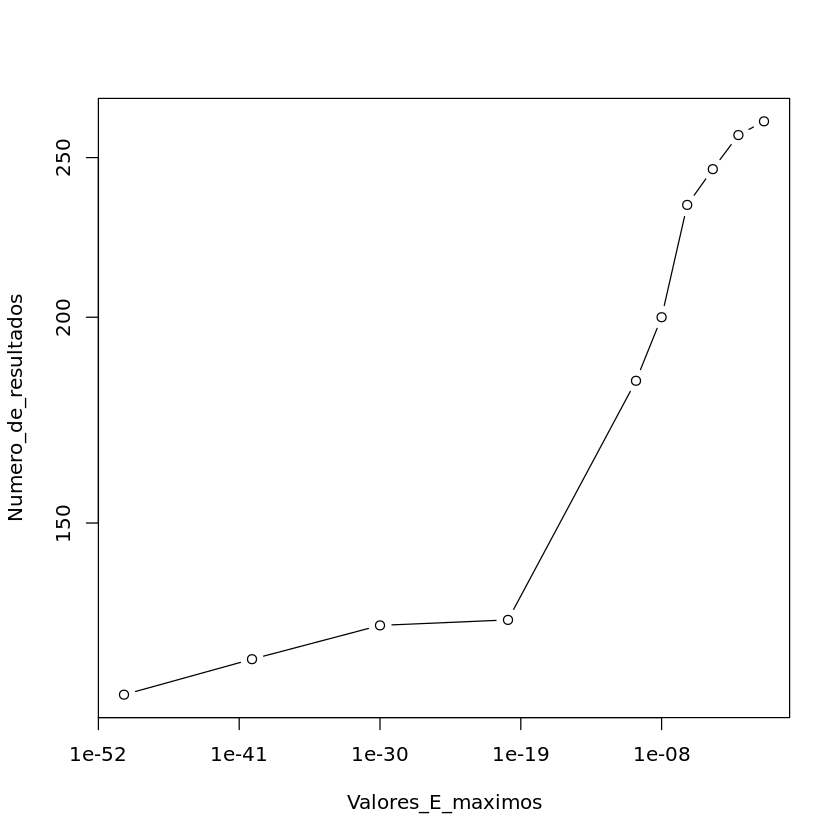

In [10]:
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

A continuación examino la relación entre la longitud del alineamiento y el valor E de los resultados guardados en la última tabla, la número 10, en la que he usado un valor E de 1 y que contiene un mayor número de resultados.

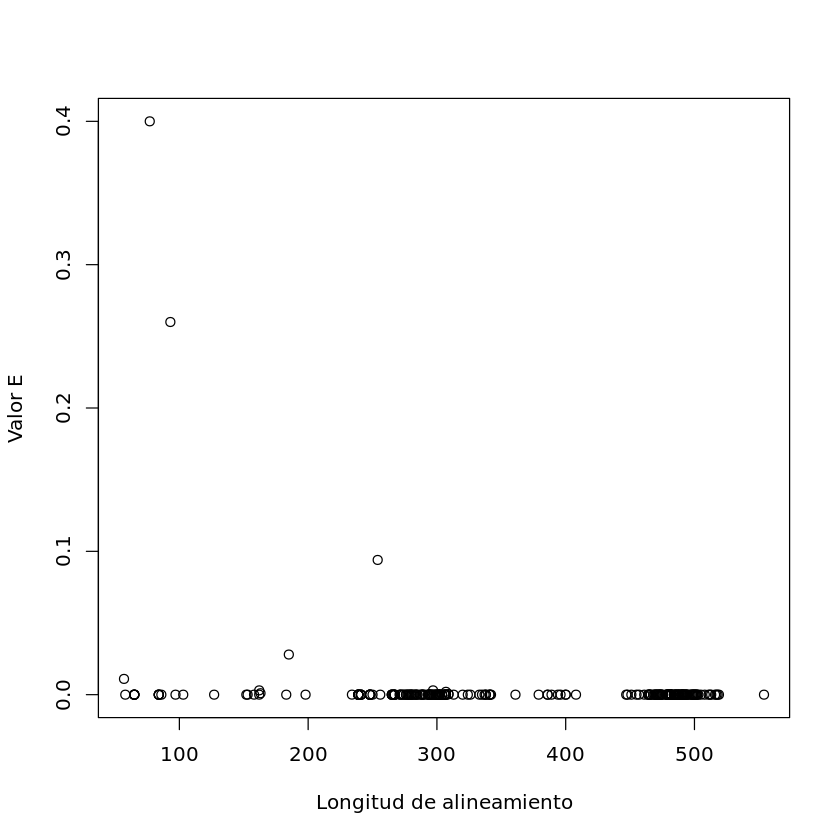

In [11]:
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Como hemos visto antes al ver el final de la tabla 10 y queda reflejado en esta gráfica, el valor E más alto en este análisis es 0.4, y solo hay un resultado con ese valor E. También hay un solo resultado con un valor E de 0.26, un solo resultado con un valor E de 0.94, y la mayoría tienen un valor E muy pequeño, por eso vemos todos los puntos acumulados por el 0.

Aunque la proteína CHRNA3 tiene 505 aminoácidos, existen alineamientos de menos de 200 y 100 aminoácidos, pero la mayoría sew encuentran alrededor de 300 o de 500. Esto significa que en la base de datos hay proteínas con una homología parcial con CHRNA3. Esa homología parcial se corresponderá a una secuencia conservada entre las proteínas de la misma familia, es decir, con otros receptores de acetilcolina, ya sean receptores nicotínicos o muscarínicos de acetilcolina. 

Podemos visualizar que posiciones de CHRNA3 son las que participan en los alineamientos parciales que hemos analizado. Para ello vamos a hacer una gráfica donde podamos ver el inicio y el final de los alineamientos de la *query* y hacernos una idea de la parte homóloga de esta proteína con las demás.

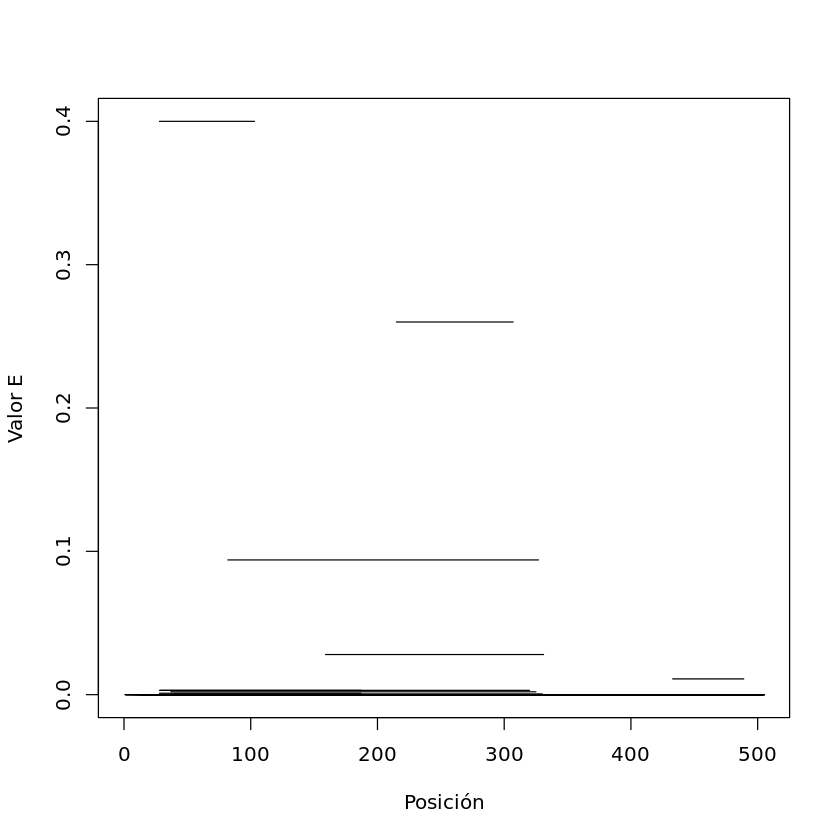

In [12]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

#La función segments() añade segmentos a un gráfico previo. Por eso, represento
#antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
#el rango del eje horizontal, determino primero el valor máximo de "qend".

AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

Como tenía pocos resultados con un valor E alto, vemos que la mayoría de alineamientos se acumulan en un valor E muy bajo, sobre todo entre las posiciones 50 y 300, aproximadamente. De los cinco resultados con un valor E mayor, vemos que 3 tienen una secuencia parecida entre las posiciones 200 y 300. Los otros dos resultados encontramos uno que se parece por la zona inicial de la proteína CHRNA3 y el otro por la zona final.

Por último, voy a explorar la distribución taxonómica de las secuencias encontradas. La columna `sblastname` ofrece una clasificación fácilmente interpretable de las secuencias. Una posibilidad es contar en cada tabla las secuencias encontradas de cada grupo taxonómico. Para ello, aplico la función `table()` a esa columna de cada tabla en `Lista_de_Tablas`:

In [13]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  31                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 19                  24                  33                   5 

[[3]]

     

El resultado del código anterior es una lista de recuentos de los diferentes grupos taxonómicos presentes en cada tabla de resultados de **blastp**. En mi caso podemos ver que el grupo con el que encuentra mayor número de proteínas similares es con los roedores, seguido de los primates, luego nematodos y finalmente pájaros, hasta la tabla 4. A partir de la 5 vemos que también se encuentran muchas homologías también con las proteínas de los artiodáctilos (even-toed ungulates). A medida que aumentamos el valor E, podemos ver que aparecen nuevos grupos taxonómicos como gasterópodos, insectivoros o serpientes. 

Como dice Viscardi *et al.* (2021) en su artículo, la mayor parte de genes relacionados con la neurotransmisión se originaron muy temprano en la evolución de los eucariotas, por lo que no es extraño que aparezcan homologías de esta subunidad de un receptor nicotínico de la acetilcolina humano con otros grupos taxonómicos tan variados. Aun así, quizá es más interesante ver qué grupos taxonómicos tienen mayor longitud del alineamiento con nuestra *query*, ya que cuantos más aminoácidos alineados más parecida será la proteína y posiblemente siga manteniendo la misma función. De esta manera podremos ver si hay algunos grupos más cercanos que también tengan un sistema neuronal desarollado y usen estos mismos receptores. Para ello voy a repetir el recuento pero solo con aquellos alineamientos que tengan una longitud mayor a 300.

In [14]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 16                  23                  31                   5 

[[2]]

              birds         bony fishes          carnivores even-toed ungulates 
                 14                   7                   1                   9 
              flies       frogs & toads        grasshoppers               moths 
                  4                   6                   1                   1 
          nematodes            primates             rodents     sharks and rays 
                 19                  24                  33                   5 

[[3]]

     

## Discusión

Utilizando la secuencia de la proteína CHRNA3 de *Homo sapiens* como *query* en búsquedas de **blastp**, encontramos proteínas homólogas en grupos taxonómicos muy variados. Sabiendo que la proteína CHRNA3 es una subunidad paráloga del receptor nicotínico de acetilcolina humano, no es de extrañar que encontremos muchas homologías con los roedores o los primates, pero igual puede sorprendernos que se encuentren tantas similitudes con los nematodos. Si hacemos una búsqueda manual de esta proteína con el identificador P32297.4 en la base de datos Pfam (Mistry *et al.*), y vamos a la opción de ver el [árbol filogenético](http://pfam.xfam.org/protein/P32297.4#tabview=tab3) de todos los ortólogos y parálogos con esta proteína, podemos ver que *C. elegans* también tiene este tipo de receptores nicotínicos y tiene varios genes que codifican para proteínas similares a la CHRNA3 humana, por eso al ver los resultados de nuestra tabla encontramos tantas homologías con los nematodos.

Sin embargo, con esta búsqueda taxonómica no han aparecido el grupo de los cnidarios. Según el artículo de Krishnan *et al.* (2015) los cnidarios son el primer grupo taxonómico dentro de los metazoos con un sistema nervioso. Una posible explicación a esto es que los receptores nicotínicos de la acetilcolina aparezcan en grupos taxonómicos posteriores y por eso no salen en la búsqueda. Esta hipótesis mantiene también con el árbol filogenético mencionado anteriorimente, ya que tampoco aparecen los cnidarios, por lo que podríamos decir que no hay homologías de esta proteína con ese grupo, a pesar de tener también un sistema nervioso.


## Referencias
- Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, *Journal of Molecular Biology*, Volume 215, Issue 3, 1990, Pages 403-410, [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).
- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, [doi:10.1093/molbev/msaa252](https://doi.org/10.1093/molbev/msaa252). 
- Jaina Mistry, Sara Chuguransky, Lowri Williams, Matloob Qureshi, Gustavo A Salazar, Erik L L Sonnhammer, Silvio C E Tosatto, Lisanna Paladin, Shriya Raj, Lorna J Richardson, Robert D Finn, Alex Bateman. Pfam: The protein families database in 2021, Nucleic Acids Research, Volume 49, Issue D1, 8 January 2021, Pages D412–D419, [doi:10.1093/nar/gkaa913](https://doi.org/10.1093/nar/gkaa913).
- Arunkumar Krishnan, Helgi B. Schiöth. The role of G protein-coupled receptors in the early evolution of neurotransmission and the nervous system, *Journal of Experimental Biology*, Volume 218, 2015, Pages 562-571, [doi: 10.1242/jeb.110312](https://doi.org/10.1242/jeb.110312)